In [77]:
import pandas as pd
df_0 = pd.read_csv('psv_range_0.csv')
df_1 = pd.read_csv('psv_range_1.csv')
df_2 = pd.read_csv('psv_range_2.csv')
df_01 = pd.concat([df_0, df_1], axis=0)
def DfProcess(df):
    df = df.drop('Unnamed: 0', axis=1)
    df = df[df.psv>=0]
    df.set_index('pid', inplace=True)
    return df
df_extube = DfProcess(df_01)
df_wean = DfProcess(df_2)

In [84]:
import seaborn as sns
from matplotlib import pyplot as plt
def Histplot(df, hue_l=None):
    fig_dims = (12, 5)
    plt.subplots(figsize=fig_dims)
    plt.title('PSV Len Distribution', fontdict={'fontsize':15, 'fontstyle':'italic'})
    plt.xlabel('PSV Mode Still time (min)')
    plt.ylabel('Sample (n)')
    sns.set_style('whitegrid')
    sns.histplot(data=df, x='psv',hue=hue_l,kde=True)
    plt.tight_layout()
    plt.show()
    plt.close()

In [85]:
def GraphProcess(df):
    print('PCV + PSV')
    Histplot(df)
    print('PSV')
    Histplot(df[df.psv!=0],hue_l='end')
    print('PSV - 0')
    Histplot(df[(df.psv!=0) & (df.end==0)])
    print('PSV - 1')
    Histplot(df[(df.psv!=0) & (df.end==1)])

def DistriProcess(df):
    len_0 = len(df[(df.psv>0) & (df.psv <=10)])
    len_1 = len(df[(df.psv>10) & (df.psv <=20)])
    len_2 = len(df[(df.psv>20) & (df.psv <=30)])
    len_3 = len(df[(df.psv>30) & (df.psv <=60)])
    len_4 = len(df[(df.psv>60) & (df.psv <=120)])
    len_5 = len(df[(df.psv>120) & (df.psv <=240)])
    len_6 = len(df[(df.psv>240)])
    range_text = '''
0 - 10 (min): {0}
10 - 20 (min): {1}
20 - 30 (min): {2}
30 - 60 (min): {3}
60 - 120 (min): {4}
120 - 240 (min): {5}
> 240 (min): {6}
'''.format(len_0, len_1, len_2, len_3, len_4, len_5, len_6)
    print(range_text)

PCV + PSV


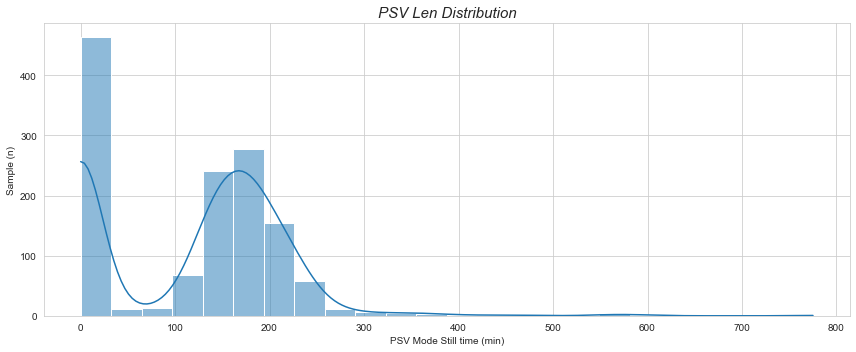

PSV


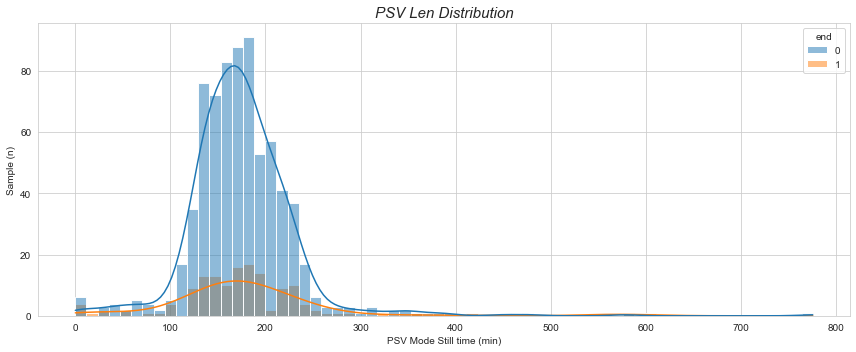

PSV - 0


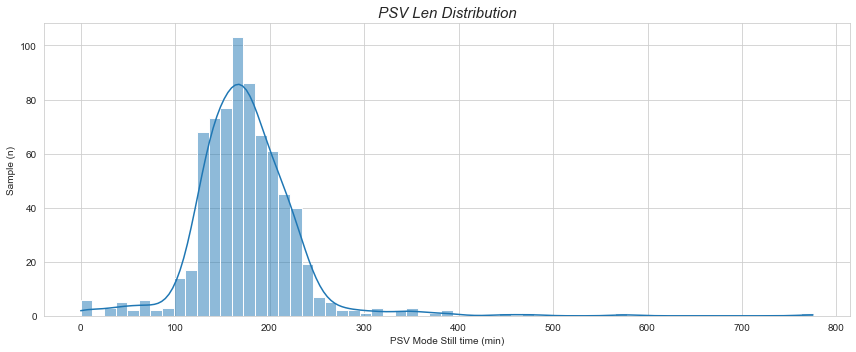

PSV - 1


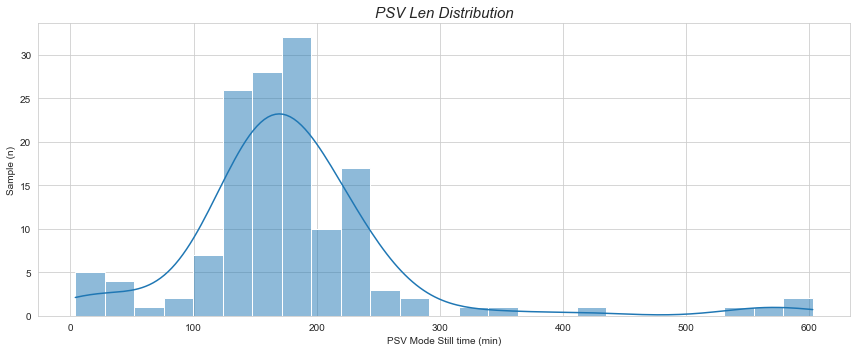


0 - 10 (min): 8
10 - 20 (min): 2
20 - 30 (min): 3
30 - 60 (min): 11
60 - 120 (min): 45
120 - 240 (min): 750
> 240 (min): 54



In [86]:
GraphProcess(df_extube)
DistriProcess(df_extube)

PCV + PSV


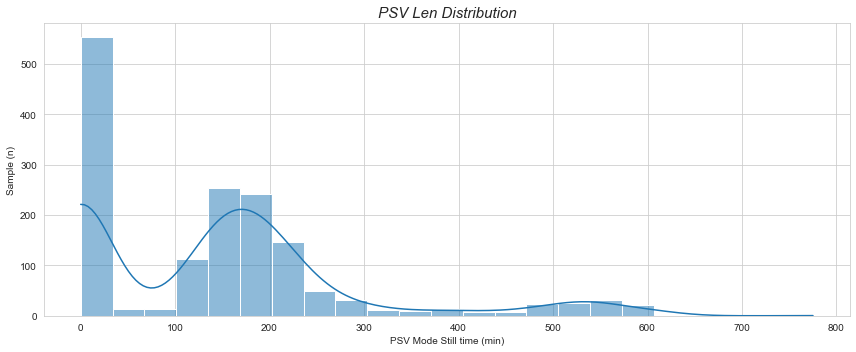

PSV


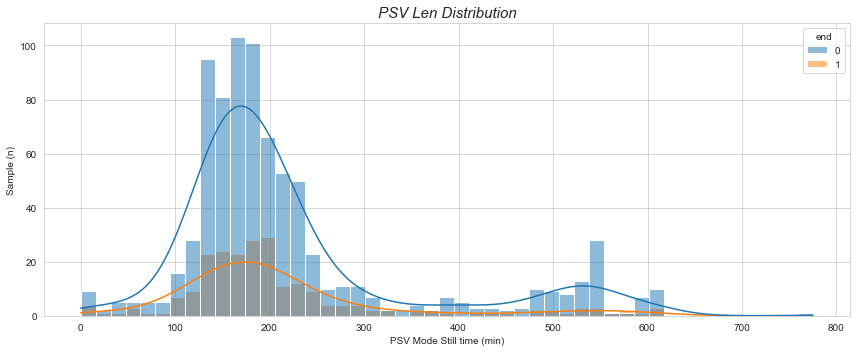

PSV - 0


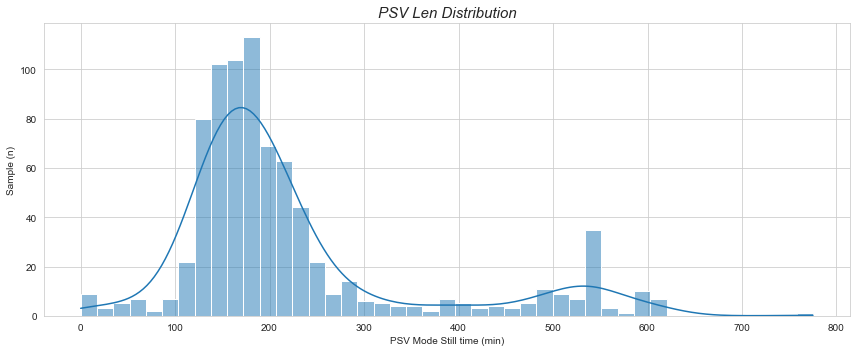

PSV - 1


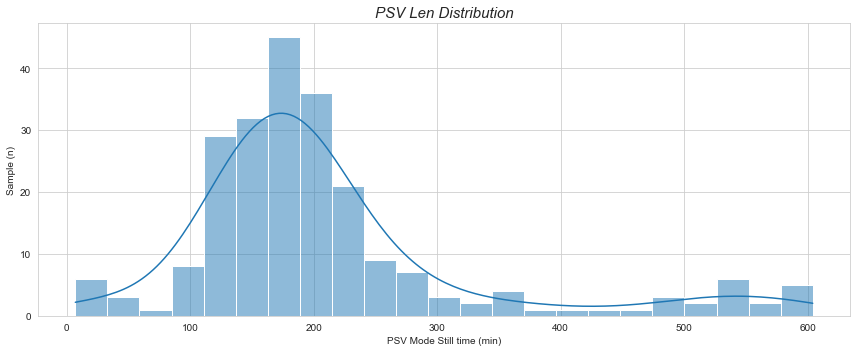


0 - 10 (min): 9
10 - 20 (min): 4
20 - 30 (min): 3
30 - 60 (min): 12
60 - 120 (min): 49
120 - 240 (min): 732
> 240 (min): 226



In [87]:
GraphProcess(df_wean)
DistriProcess(df_wean)